In [26]:
import pandas as pd
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from community import community_louvain

In [2]:
#đọc dữ liệu từ file csv
dt=pd.read_csv("miniProject.csv", encoding="ISO-8859-1")
dt.dropna()
dt.drop_duplicates()
dt

,Airline,DestinationCountry
0,Air France,Madagascar
1,Swissair,Madagascar
2,Air France,Kenya
3,Air France,Kenya
4,Air France,Kenya
...,...,...
72,Swissair,Mozambique
73,Swissair,Mozambique
74,Swissair,Mozambique
75,Swissair,Mozambique


In [3]:
B = nx.Graph()
Airline = dt['Airline']
DestinationCountry = dt['DestinationCountry']
print('So Airline', Airline.nunique())
print('So DestinationCountry', DestinationCountry.nunique())
print('So canh', len(dt))

So Airline 10
So DestinationCountry 10
So canh 77


In [4]:
for index, row in dt.iterrows():
    B.add_edge(row['Airline'], row['DestinationCountry'], weight=1)
B.add_nodes_from(DestinationCountry,bipartite=0)
B.add_nodes_from(Airline,bipartite=1)

<Figure size 864x864 with 0 Axes>

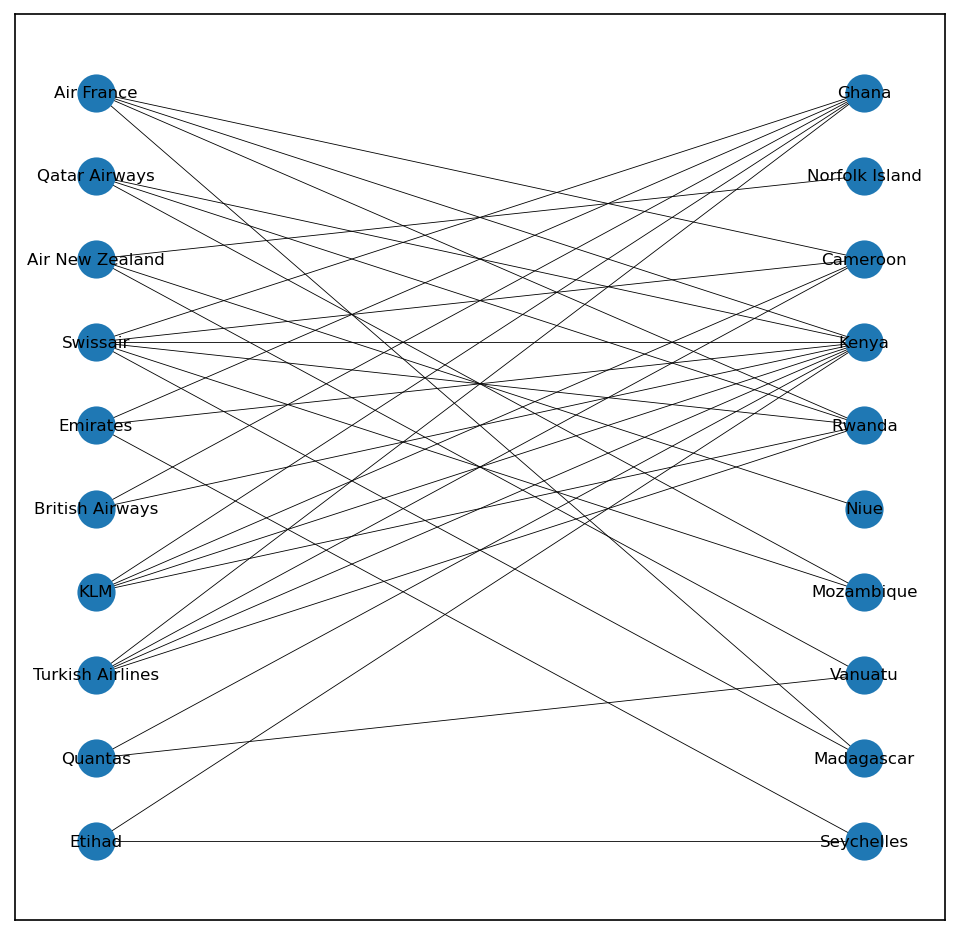

In [5]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(B)
fig, ax = plt.subplots(1,1,figsize=(8,8), dpi=150)
nx.draw_networkx(B, pos = nx.drawing.layout.bipartite_layout(B, Airline),font_size=8,width=0.4)

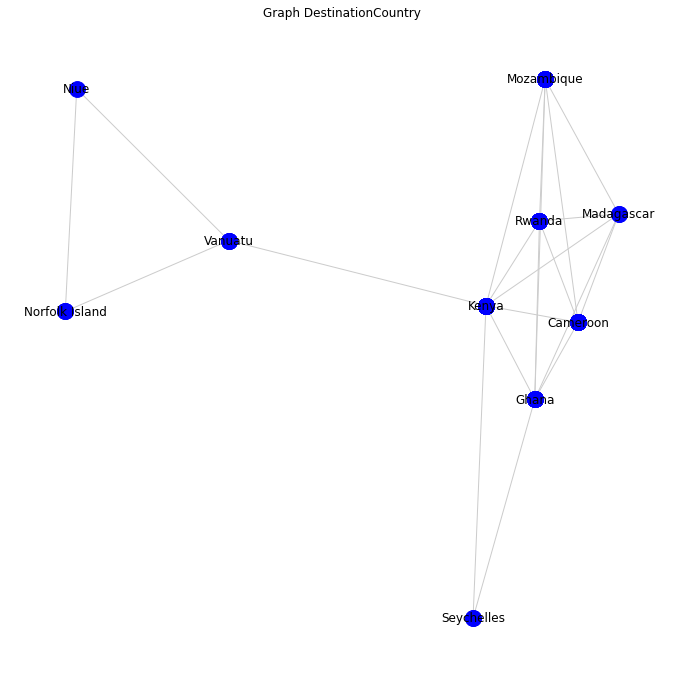

In [6]:
G = bipartite.weighted_projected_graph(B,DestinationCountry)
plt.figure(figsize=(12,12))

layout = nx.spring_layout(G)

nx.draw_networkx_nodes(G, layout,nodelist=DestinationCountry,node_size=250,node_color='blue')
nx.draw_networkx_edges(G, layout, edge_color='#cccccc')
node_labels = dict(zip(DestinationCountry, DestinationCountry))
nx.draw_networkx_labels(G, layout, labels=node_labels)
plt.axis('off')

plt.title("Graph DestinationCountry")

plt.show()

In [7]:
labels = nx.get_edge_attributes(G, 'weight')
df2 = pd.DataFrame(columns=['source', 'target', 'weight'])
for key, value in labels.items():
    df2 = df2.append({'source':key[0], 'target':key[1], 'weight':value}, ignore_index=True)
    df2.to_csv (r'gelphi.csv', index = False, header=True)

In [8]:
df = pd.read_csv('gelphi.csv', usecols=['source', 'target'])
df.dropna()
df.drop_duplicates()
df

,source,target
0,Madagascar,Mozambique
1,Madagascar,Rwanda
2,Madagascar,Kenya
3,Madagascar,Cameroon
4,Madagascar,Ghana
5,Kenya,Seychelles
6,Kenya,Mozambique
7,Kenya,Rwanda
8,Kenya,Cameroon
9,Kenya,Vanuatu


In [9]:
G = nx.Graph()

edges = df[['source', 'target']]
G = nx.from_pandas_edgelist(edges, 'source', 'target')

print('Số đỉnh của đồ thị là', len(G.nodes()))
print('Số cạnh của đồ thị là', len(G.edges()))

Số đỉnh của đồ thị là 10
Số cạnh của đồ thị là 21


In [10]:
print('Kiểm tra đồ thị liên thông: ')
nx.is_connected(G)

Kiểm tra đồ thị liên thông: 


True

No handles with labels found to put in legend.


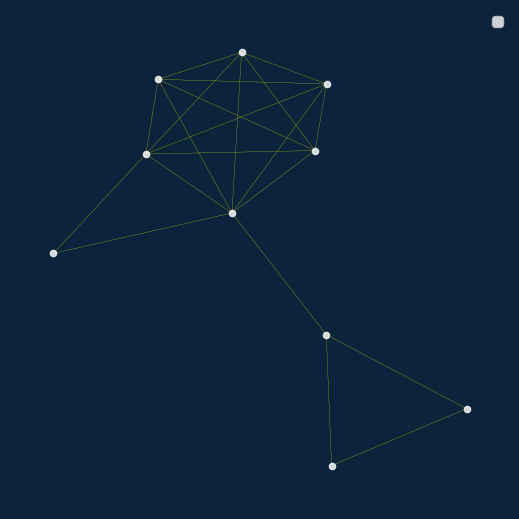

In [11]:
# %load_ext autotime
# nx.draw_networkx(G)

pd.set_option('precision',10)

nodes = G.nodes()
degree = G.degree()
colors = [degree[n] for n in nodes]

pos = nx.kamada_kawai_layout(G)

cmap = plt.cm.viridis_r
cmap = plt.cm.Greys

vmin = min(colors)
vmax = max(colors)

fig = plt.figure(figsize = (5,5), dpi=100)

nx.draw(G,pos,alpha = 0.8, nodelist = nodes, node_color = 'w', node_size = 20, with_labels= False,font_size = 6, width = 0.2, cmap = cmap, edge_color ='yellow')
fig.set_facecolor('#0B243B')

plt.legend()
plt.show()

In [12]:
#degree of each node
def print_table(data, columns):
  df = pd.DataFrame(data, columns=columns)
  return df

degree_dict = { node: 0 for node in G.nodes() }

for node in G.nodes():
  degree_dict[node] = len(list(G.neighbors(node)))

degree_df = print_table(degree_dict.items(), ['Node', 'Degree'])

degree_df

,Node,Degree
0,Madagascar,5
1,Mozambique,5
2,Rwanda,5
3,Kenya,7
4,Cameroon,5
5,Ghana,6
6,Seychelles,2
7,Vanuatu,3
8,Niue,2
9,Norfolk Island,2


In [13]:
###Eigen Vector
eig_cen = nx.eigenvector_centrality(G, max_iter=100)

sorted_eig_cen = sorted(eig_cen.items(), key=lambda x:x[1], reverse=True)

eig_cen_df = print_table(eig_cen.items(), ['Node', 'Eigenvector Centrality'])

eig_cen_df

,Node,Eigenvector Centrality
0,Madagascar,0.3891629901
1,Mozambique,0.3891629901
2,Rwanda,0.3891629901
3,Kenya,0.4304998260
4,Cameroon,0.3891629901
5,Ghana,0.4156486976
6,Seychelles,0.1635299281
7,Vanuatu,0.0916925731
8,Niue,0.0219677384
9,Norfolk Island,0.0219677384


In [14]:
top_ten_max_eig_cen_df = sorted_eig_cen[:10]
print('Top 10 quốc gia có Eigenvector Centrality lớn nhất: ')
print_table(top_ten_max_eig_cen_df, ['DestinationCountry', 'Eigenvector Centrality'])

Top 10 quốc gia có Eigenvector Centrality lớn nhất: 


,DestinationCountry,Eigenvector Centrality
0,Kenya,0.4304998260
1,Ghana,0.4156486976
2,Madagascar,0.3891629901
3,Mozambique,0.3891629901
4,Rwanda,0.3891629901
5,Cameroon,0.3891629901
6,Seychelles,0.1635299281
7,Vanuatu,0.0916925731
8,Niue,0.0219677384
9,Norfolk Island,0.0219677384


In [15]:
#page rank
pagerank = nx.pagerank(G, tol=1e-6, alpha=0.85)
sorted_pagerank = sorted(pagerank.items(), key=lambda x:x[1], reverse=True)

pagerank_df = print_table(pagerank.items(), ['Node', 'Pagerank'])

pagerank_df

,Node,Pagerank
0,Madagascar,0.1057569092
1,Mozambique,0.1057569092
2,Rwanda,0.1057569092
3,Kenya,0.1542837399
4,Cameroon,0.1057569092
5,Ghana,0.1276725704
6,Seychelles,0.0518212418
7,Vanuatu,0.0962058609
8,Niue,0.0734944751
9,Norfolk Island,0.0734944751


In [16]:
top_ten_max_pagerank = sorted_pagerank[:10]
print('Top 10 quốc gia có Pagerank lớn nhất: ')
print_table(top_ten_max_pagerank, ['DestinationCountry', 'Pagerank'])

Top 10 quốc gia có Pagerank lớn nhất: 


,DestinationCountry,Pagerank
0,Kenya,0.1542837399
1,Ghana,0.1276725704
2,Madagascar,0.1057569092
3,Mozambique,0.1057569092
4,Rwanda,0.1057569092
5,Cameroon,0.1057569092
6,Vanuatu,0.0962058609
7,Niue,0.0734944751
8,Norfolk Island,0.0734944751
9,Seychelles,0.0518212418


In [17]:
#betweeness
bet_cen = nx.betweenness_centrality(G, normalized=False) #returns a dictionary
sorted_bet_cen = sorted(bet_cen.items(), key=lambda x:x[1], reverse=True)

bet_cen_df = print_table(bet_cen.items(), ['Node', 'Betweenness centrality'])

bet_cen_df

,Node,Betweenness centrality
0,Madagascar,0.0
1,Mozambique,0.0
2,Rwanda,0.0
3,Kenya,20.0
4,Cameroon,0.0
5,Ghana,2.0
6,Seychelles,0.0
7,Vanuatu,14.0
8,Niue,0.0
9,Norfolk Island,0.0


In [18]:
#girvan newman
def edge_to_remove(graph):
  G_dict = nx.edge_betweenness_centrality(graph)
  edge = ()

  # extract the edge with highest edge betweenness centrality score
  for key, value in sorted(G_dict.items(), key=lambda item: item[1], reverse = True):
      edge = key
      break

  return edge

In [19]:
def girvan_newman(graph):
    # find number of connected components
    sg = nx.connected_components(graph)
    sg_count = nx.number_connected_components(graph)

    while(sg_count == 1):
        graph.remove_edge(edge_to_remove(graph)[0], edge_to_remove(graph)[1])
        sg = nx.connected_components(graph)
        sg_count = nx.number_connected_components(graph)
    return sg

In [20]:
# find communities in the graph
c = girvan_newman(G.copy())

# find the nodes forming the communities
node_groups = []

for i in c:
  node_groups.append(list(i))

In [21]:
print(node_groups)

[['Seychelles', 'Madagascar', 'Mozambique', 'Rwanda', 'Kenya', 'Cameroon', 'Ghana'], ['Norfolk Island', 'Vanuatu', 'Niue']]


No handles with labels found to put in legend.


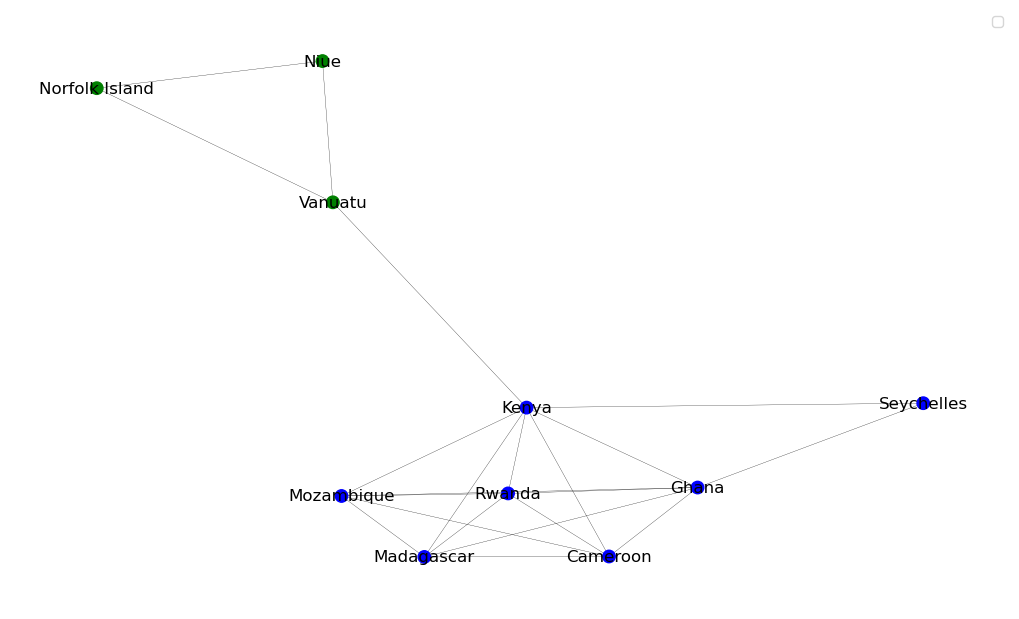

In [22]:
# plot the communities
color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('blue')
    else: 
        color_map.append('green')  

pd.set_option('precision',10)

nodes = G.nodes()
degree = G.degree()
colors = [degree[n] for n in nodes]

pos = nx.spring_layout(G)
fig = plt.figure(figsize = (10,6), dpi=100)



cmap = plt.cm.viridis_r
cmap = plt.cm.Greys

vmin = min(colors)
vmax = max(colors)


nx.draw(G, node_color=color_map, with_labels=True,node_size = 80,width = 0.2)
# nx.draw(G,pos,alpha = 0.8, nodelist = nodes, node_color = color_map, node_size = 20, with_labels= False,font_size = 6, width = 0.2, cmap = cmap, edge_color ='yellow')


plt.legend()
plt.show()

<Figure size 1224x864 with 0 Axes>

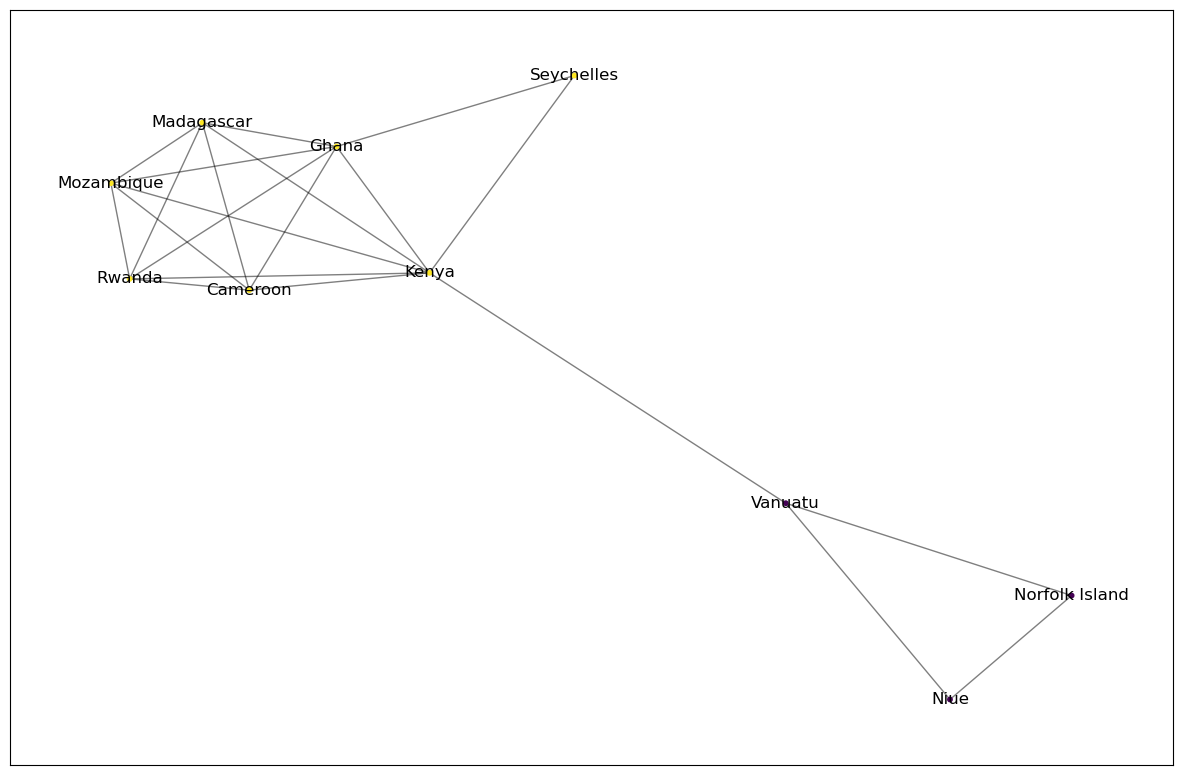

In [27]:
plt.figure(figsize=(17,12))

#compute the best partition
partition = community_louvain.best_partition(G)

#draw the graph
pos = nx.spring_layout(G)

#color the nodes according to their partition
fig = plt.figure(figsize = (15,10), dpi=100)

cmap = cm.get_cmap('viridis', max(partition.values())+1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=10,cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos)

plt.show()